In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.impute import SimpleImputer
import numpy as np
import re
import time

pd.set_option('display.max_row', 50)
pd.set_option('display.max_columns', 50)

task = pd.read_csv('main_task.xlt')

In [2]:
task.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [3]:
task.columns = ['Restaurant_id', 'City', 'CuisineStyle', 'Ranking', 'Rating',
                'PriceRange', 'NumberofReviews', 'Reviews', 'URL_TA', 'ID_TA']

In [4]:
print(f'{task.isnull().any().sum()} колонок содержат пустые значения.')

3 колонок содержат пустые значения.


Text(0.5, 1, 'Карта отсутствующих значений')

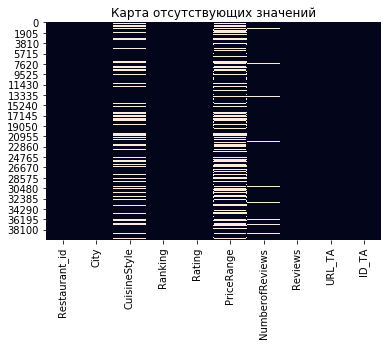

In [5]:
task.isnull().sum()
sns.heatmap(task.isnull(), cbar=False).set_title(
    "Карта отсутствующих значений")

PriceRange, CuisineStyle и NumberOfReview содержат пустые значения.


In [6]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_id    40000 non-null  object 
 1   City             40000 non-null  object 
 2   CuisineStyle     30717 non-null  object 
 3   Ranking          40000 non-null  float64
 4   Rating           40000 non-null  float64
 5   PriceRange       26114 non-null  object 
 6   NumberofReviews  37457 non-null  float64
 7   Reviews          40000 non-null  object 
 8   URL_TA           40000 non-null  object 
 9   ID_TA            40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


# Добавление данных


Добавим страну. Чтобы потом по странам добавить информацию.

In [7]:
city_dict = {
    'London': "United Kingdom",
    'Paris': 'France',
    'Madrid': 'Spain',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Milan': 'Italy',
    'Rome': 'Italy',
    'Prague': 'Czechia',
    'Lisbon': 'Portugal',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Brussels': 'Belgium',
    'Hamburg': 'Germany',
    'Munich': 'Germany',
    'Lyon': 'France',
    'Stockholm': 'Sweden',
    'Budapest': 'Hungary',
    'Warsaw': 'Poland',
    'Dublin': 'Ireland',
    'Copenhagen': 'Denmark',
    'Athens': 'Greece',
    'Edinburgh': 'United Kingdom',
    'Zurich': 'Switzerland',
    'Oporto': 'Portugal',
    'Geneva': 'Switzerland',
    'Krakow': 'Poland',
    'Oslo': 'Norway',
    'Helsinki': 'Finland',
    'Bratislava': 'Slovakia',
    'Luxembourg': 'Luxembourg',
    'Ljubljana': 'Slovenia'
}


def setCountry(x):
    for c in city_dict:
        if x == c:
            return city_dict.get(c)

In [8]:
task['Country'] = task.City.apply(lambda x: setCountry(x))

Добавим информацию по странам:Безопасность и защита (Safety and Security), Свобода личности (Personal Freedom), Правительство (Governance), Социальный капитал (Social Capital), Инвестиционная среда (Investment Environment), Условия для предприятий (Enterprise Conditions), Доступ к рынку и инфраструктуре (Market Access and Infrastructure), Уровень экономики (Market Access and Infrastructure), Условия жизни (Living Conditions), Здоровье (Health), Образование (Education), Окружающая среда/Природа (Natural Environment).
Информация взята из The_Legatum_Prosperity_Index_2019.pdf.

In [9]:
city = pd.read_csv('data_country.csv',sep=';')
city.head(10)

,2019 Rank,Country,Safety and Security,Personal Freedom,Governance,Social Capital,Investment Environment,Enterprise Conditions,Market Access and Infrastructure,Economic Quality,Living Conditions,Health,Education,Natural Environment
0,1,Denmark,5,2,3,2,6,7,8,8,1,8,3,10
1,2,Norway,2,1,1,1,2,9,15,12,7,5,11,7
2,3,Switzerland,1,12,7,8,13,3,7,2,4,3,12,5
3,4,Sweden,11,4,6,9,10,13,5,4,3,15,17,1
4,5,Finland,17,3,2,4,7,18,10,21,6,26,6,2
5,6,Netherlands,12,5,4,6,12,8,4,6,2,9,8,54
6,7,New Zealand,13,10,5,7,3,14,21,19,26,22,10,6
7,8,Germany,21,13,9,13,15,4,11,5,5,12,21,17
8,9,Luxembourg,3,8,8,21,22,16,2,7,9,19,33,9
9,10,Iceland,6,6,13,3,25,30,12,16,20,7,13,8


In [10]:
city=city.drop(columns='2019 Rank') # удаляем столбец с порядковым номером
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0    Country                           94 non-null     object
 1    Safety and Security               94 non-null     int64 
 2    Personal Freedom                  94 non-null     int64 
 3    Governance                        94 non-null     int64 
 4    Social Capital                    94 non-null     int64 
 5    Investment Environment            94 non-null     int64 
 6    Enterprise Conditions             94 non-null     int64 
 7    Market Access and Infrastructure  94 non-null     int64 
 8    Economic Quality                  94 non-null     int64 
 9    Living Conditions                 94 non-null     int64 
 10   Health                            94 non-null     int64 
 11   Education                         94 non-null     int64 
 12   Natural E

In [11]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_id    40000 non-null  object 
 1   City             40000 non-null  object 
 2   CuisineStyle     30717 non-null  object 
 3   Ranking          40000 non-null  float64
 4   Rating           40000 non-null  float64
 5   PriceRange       26114 non-null  object 
 6   NumberofReviews  37457 non-null  float64
 7   Reviews          40000 non-null  object 
 8   URL_TA           40000 non-null  object 
 9   ID_TA            40000 non-null  object 
 10  Country          40000 non-null  object 
dtypes: float64(3), object(8)
memory usage: 3.4+ MB


In [12]:
city.columns = ['Country', 'SafetyAndSecurity', 'PersonalFreedom', 'Governance',
                'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions',
                'MarketAccessAndInfrastructure', 'EconomicQuality',
                'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']

In [13]:
result =task.merge(city,on = 'Country')
result.head(10)

,Restaurant_id,City,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16
1,id_10057,Paris,NaN,10059.0,4.5,NaN,4.0,"[['Fab Food'], ['08/20/2011']]",/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16
2,id_2434,Lyon,['Vietnamese'],2435.0,3.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16
3,id_11291,Paris,['French'],11293.0,4.5,$$ - $$$,10.0,[['A relaxing dinner in a very personal atmos....,/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16
4,id_5459,Paris,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132.0,[['Very good Thai Food but small Portions and....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16
5,id_9924,Paris,['Pub'],9926.0,3.5,$,39.0,"[['English pub', 'Shameful'], ['02/14/2017', '...",/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16
6,id_1048,Paris,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281.0,"[['Amazing French cuisine', 'One of our best m...",/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16
7,id_9231,Paris,"['French', 'Vietnamese']",9233.0,4.0,NaN,25.0,"[[], []]",/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16
8,id_1585,Lyon,['Italian'],1586.0,4.0,$$ - $$$,25.0,[['Too busy and too important to serve custom....,/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16
9,id_10032,Paris,NaN,10034.0,4.5,NaN,2.0,"[[], []]",/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16


In [14]:
result.fillna("0", inplace=True)


# Предобработка City

In [15]:
result = pd.get_dummies(result, columns=['City'], dummy_na=True)
result = result.drop(columns='City_nan')

In [16]:
result.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,...,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,id_10057,0,10059.0,4.5,0,4,"[['Fab Food'], ['08/20/2011']]",/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,id_2434,['Vietnamese'],2435.0,3.0,0,4,"[[], []]",/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,id_11291,['French'],11293.0,4.5,$$ - $$$,10,[['A relaxing dinner in a very personal atmos....,/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,id_5459,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132,[['Very good Thai Food but small Portions and....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,id_9924,['Pub'],9926.0,3.5,$,39,"[['English pub', 'Shameful'], ['02/14/2017', '...",/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,id_1048,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281,"[['Amazing French cuisine', 'One of our best m...",/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,id_9231,"['French', 'Vietnamese']",9233.0,4.0,0,25,"[[], []]",/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,id_1585,['Italian'],1586.0,4.0,$$ - $$$,25,[['Too busy and too important to serve custom....,/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,id_10032,0,10034.0,4.5,0,2,"[[], []]",/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Предобработка Reviews

In [17]:
result.Reviews = result.Reviews.astype(str).apply(
    lambda x: x.replace('[]', 'no data'))
result.Reviews = result.Reviews.astype(str).apply(lambda x: x.replace(
    '\\', "").replace("''", "").replace("[", "").replace("]", ""))
result.Reviews = result.Reviews.apply(lambda x: x.split(','))

In [18]:
result.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,...,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,"['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,id_10057,0,10059.0,4.5,0,4,"['Fab Food', '08/20/2011']",/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,id_2434,['Vietnamese'],2435.0,3.0,0,4,"[no data, no data]",/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,id_11291,['French'],11293.0,4.5,$$ - $$$,10,['A relaxing dinner in a very personal atmos.....,/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,id_5459,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132,['Very good Thai Food but small Portions and.....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,id_9924,['Pub'],9926.0,3.5,$,39,"['English pub', 'Shameful', '02/14/2017', '...",/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,id_1048,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281,"['Amazing French cuisine', 'One of our best m...",/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,id_9231,"['French', 'Vietnamese']",9233.0,4.0,0,25,"[no data, no data]",/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,id_1585,['Italian'],1586.0,4.0,$$ - $$$,25,['Too busy and too important to serve custom.....,/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,id_10032,0,10034.0,4.5,0,2,"[no data, no data]",/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Создадим 2 новых столбца на основе Reviews - ReviewTime и PublishTime. И приведем их к виду unixtime.

In [19]:
result['ReviewTime'] = result.Reviews.apply(lambda x: x[-1].strip())
result['ReviewTime'] = result.ReviewTime.apply(
    lambda x: x.replace("[", "").replace("]", "").replace("'", ""))
result['PublishTime'] = result.Reviews.apply(lambda x: x[-2].strip())
result['PublishTime'] = result.PublishTime.apply(
    lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

result['ReviewTime'] = result.ReviewTime.apply(
    lambda x: x if "/2" in x else np.nan)
result['PublishTime'] = result.PublishTime.apply(
    lambda x: x if "/2" in x else np.nan)

In [20]:
def resetReviews(s): #удалим из столбца Reviews даты
    review=''
    for x in s:
        if "/2" in x:
            continue
        else:
            review+=" "+x
    return review

result['Reviews'] = result.Reviews.apply(lambda x: resetReviews(x))
result.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,...,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/20/2017,12/31/2017
1,id_10057,0,10059.0,4.5,0,4,'Fab Food',/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,08/20/2011,NaN
2,id_2434,['Vietnamese'],2435.0,3.0,0,4,no data no data,/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,id_11291,['French'],11293.0,4.5,$$ - $$$,10,'A relaxing dinner in a very personal atmos...',/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,03/08/2015,NaN
4,id_5459,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132,'Very good Thai Food but small Portions and.....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,07/29/2017,10/18/2017
5,id_9924,['Pub'],9926.0,3.5,$,39,'English pub' 'Shameful',/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12/10/2017,02/14/2017
6,id_1048,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281,'Amazing French cuisine' 'One of our best me...,/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/16/2017,12/18/2017
7,id_9231,"['French', 'Vietnamese']",9233.0,4.0,0,25,no data no data,/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN
8,id_1585,['Italian'],1586.0,4.0,$$ - $$$,25,'Too busy and too important to serve custom...',/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11/10/2014,NaN
9,id_10032,0,10034.0,4.5,0,2,no data no data,/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN


In [21]:
result.fillna(method='pad', inplace=True)
result.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,...,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/20/2017,12/31/2017
1,id_10057,0,10059.0,4.5,0,4,'Fab Food',/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,08/20/2011,12/31/2017
2,id_2434,['Vietnamese'],2435.0,3.0,0,4,no data no data,/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,08/20/2011,12/31/2017
3,id_11291,['French'],11293.0,4.5,$$ - $$$,10,'A relaxing dinner in a very personal atmos...',/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,03/08/2015,12/31/2017
4,id_5459,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132,'Very good Thai Food but small Portions and.....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,07/29/2017,10/18/2017
5,id_9924,['Pub'],9926.0,3.5,$,39,'English pub' 'Shameful',/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12/10/2017,02/14/2017
6,id_1048,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281,'Amazing French cuisine' 'One of our best me...,/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/16/2017,12/18/2017
7,id_9231,"['French', 'Vietnamese']",9233.0,4.0,0,25,no data no data,/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/16/2017,12/18/2017
8,id_1585,['Italian'],1586.0,4.0,$$ - $$$,25,'Too busy and too important to serve custom...',/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11/10/2014,12/18/2017
9,id_10032,0,10034.0,4.5,0,2,no data no data,/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11/10/2014,12/18/2017


In [22]:
result['ReviewTime'] = result.ReviewTime.apply(lambda x: time.mktime(
    datetime.datetime.strptime(str(x), "%m/%d/%Y").timetuple()))
result['PublishTime'] = result.PublishTime.apply(lambda x: time.mktime(
    datetime.datetime.strptime(str(x), "%m/%d/%Y").timetuple()))
result.head(10)

,Restaurant_id,CuisineStyle,Ranking,Rating,PriceRange,NumberofReviews,Reviews,URL_TA,ID_TA,Country,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,...,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,ReviewTime,PublishTime
0,id_5569,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194,'Good food at your doorstep' 'A good hotel r...,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.511125e+09,1.514668e+09
1,id_10057,0,10059.0,4.5,0,4,'Fab Food',/Restaurant_Review-g187147-d2040769-Reviews-Le...,d2040769,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.313788e+09,1.514668e+09
2,id_2434,['Vietnamese'],2435.0,3.0,0,4,no data no data,/Restaurant_Review-g187265-d3543959-Reviews-Vi...,d3543959,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.313788e+09,1.514668e+09
3,id_11291,['French'],11293.0,4.5,$$ - $$$,10,'A relaxing dinner in a very personal atmos...',/Restaurant_Review-g187147-d3543081-Reviews-La...,d3543081,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.425762e+09,1.514668e+09
4,id_5459,"['Asian', 'Thai', 'Vegetarian Friendly']",5460.0,3.5,$$ - $$$,132,'Very good Thai Food but small Portions and.....,/Restaurant_Review-g187147-d953033-Reviews-Cha...,d953033,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.501276e+09,1.508274e+09
5,id_9924,['Pub'],9926.0,3.5,$,39,'English pub' 'Shameful',/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.512853e+09,1.487020e+09
6,id_1048,"['French', 'European', 'Vegetarian Friendly']",1049.0,4.5,$$$$,281,'Amazing French cuisine' 'One of our best me...,/Restaurant_Review-g187147-d719083-Reviews-Le_...,d719083,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.510780e+09,1.513544e+09
7,id_9231,"['French', 'Vietnamese']",9233.0,4.0,0,25,no data no data,/Restaurant_Review-g187147-d7332770-Reviews-Ch...,d7332770,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.510780e+09,1.513544e+09
8,id_1585,['Italian'],1586.0,4.0,$$ - $$$,25,'Too busy and too important to serve custom...',/Restaurant_Review-g187265-d4295258-Reviews-Es...,d4295258,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.415567e+09,1.513544e+09
9,id_10032,0,10034.0,4.5,0,2,no data no data,/Restaurant_Review-g187147-d1035491-Reviews-Le...,d1035491,France,30,23,20,41,18,26,14,37,17,16,29,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.415567e+09,1.513544e+09


In [23]:
result=pd.get_dummies(result, columns=['Country'], dummy_na=True)

Создадим словари и выставим оценки на основе отзывов.

In [24]:
great = ["Delicious", "Great", "tasteful","Awesome", "Must Visit", "Brilliant","delicious", "great","favourites", "Recommend it", "EXCELLENT", "Perfect", "tasty", "COMPLETELY REAL", "outstanding", "Favourite", "Wonderful", "fantastic", "Fantastic", "Superb", "Amazing",
         "BEST", "wonderful", "perfect", "Best", "best", "AMAZING","Amazing", "favorite", "Excellent", "excellent", "GREAT", "Cool", "cool", "Delightful"]
good = ["Good", "good", "Nice", "average","Pleasant", "surprise","hospitable", "Cosy", "Soso", "Average", "Beautiful", "nice", "No bad", "Friendly", "friendly", "charm",
        "no bad", "Not bad", "pleasant","Welcoming", "is ok", "OK", "not bad", "relaxing", "Relaxing", "Alright", "Love", "Tasty"]
bad = ["No", "no", "Mediocre", "not", "Not", "poor", "bad", "Worst", "Bad", "Shameful",
       "Too busy", "appalling", "rude", "Dirty", "Underwhelmed","Awful", "hidden gem", "Horrible", "horrible", "Disappointed", "Don't eat", "Avoid", "could improve", "Dissapointed"]


def setMarksToReview(s):
    mark = 0
    for st in s:
     #   print(s)
        if "no data" in s:
            break

        for g in good:
            if g in s:
                #    print(g)
                mark = 3.5
                break
        for b in bad:
            if b in s:
                #    print(b)
                mark = -1
                break
        for gr in great:
            if gr in s:
              #  print(gr)
                mark = 5
                break
    else:
        return (mark)


result['ReviewsMark'] = result.Reviews.apply(lambda x: setMarksToReview(x))
result = result.fillna("0")

# Предобработка PriceRange

In [25]:
priceRange_dict={'0':0,'$':1, '$$ - $$$':2, '$$$$': 3}
result.PriceRange = result.PriceRange.replace(to_replace=priceRange_dict)


# Предобработка Cuisine Style

Создадим список всех значений из CuisineStyle. И создадим на основе него новые признаки.

In [26]:
cuisines=set()
tpl = '^\d|&'
for recipe in result['CuisineStyle']:
    if recipe!=0:
        for r in recipe.split(','):
            if re.match(tpl, r) is None:
                cuisines.add(r.replace("[","").replace("]","").replace("'","").replace(",","").strip())
else:
    print(cuisines)

{'Cafe', 'Persian', 'Sushi', 'Venezuelan', 'British', 'Swedish', 'Mexican', 'Danish', 'Burmese', 'Southwestern', 'Latvian', 'Native American', 'Italian', 'Bar', 'Fast Food', 'Jamaican', 'Peruvian', 'Lebanese', 'Diner', 'Minority Chinese', 'Gastropub', 'Singaporean', 'Cambodian', 'Salvadoran', 'Indonesian', 'Belgian', 'Pakistani', 'Afghani', 'Spanish', 'French', 'Hawaiian', 'Cuban', 'Egyptian', 'Healthy', 'Portuguese', 'South American', 'Vegetarian Friendly', 'Indian', 'Greek', 'Steakhouse', 'Irish', 'Israeli', 'Ukrainian', 'Barbecue', 'Azerbaijani', 'Czech', 'German', 'Thai', 'Turkish', 'Uzbek', 'Contemporary', 'Fujian', 'Gluten Free Options', 'Austrian', 'Filipino', 'European', 'Georgian', 'Tunisian', 'Tibetan', 'Eastern European', 'Middle Eastern', 'Armenian', 'Cajun & Creole', 'Xinjiang', 'Chilean', 'Scandinavian', 'Mediterranean', 'Halal', 'American', 'Bangladeshi', 'Caucasian', 'Welsh', 'Asian', 'Pub', 'Ethiopian', 'Latin', 'Mongolian', 'Soups', 'Street Food', 'Korean', 'Russian',

In [27]:
def find(x,y):
    if x in y:
        return 1
    else:
        return 0

for c in cuisines:
    result[c] = result.apply(lambda x: find(c, x['CuisineStyle']), axis = 1)

## Корреляция признаков.

In [28]:
result.corr()

,Ranking,Rating,PriceRange,SafetyAndSecurity,PersonalFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessAndInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,...,Ecuadorean,Moroccan,Canadian,Slovenian,New Zealand,Vietnamese,Balti,Kosher,Yunnan,Taiwanese,Central American,Delicatessen,Arabic,Romanian,Croatian,International,Malaysian,Fusion,Caribbean,Brew Pub,Central European,Polynesian,Brazilian,Central Asian,Australian
Ranking,1.000000,-0.368371,-0.243553,0.092603,-0.087417,-0.128157,-0.172802,-0.278712,-0.136103,-0.250598,0.007713,-0.159455,-0.043877,-0.122448,-0.059022,-0.094372,-0.095177,0.017390,-0.026367,-0.075669,-0.095232,-0.095534,-0.094270,-0.094965,-0.092951,...,0.008017,0.008252,-0.001825,-0.038691,0.000988,-0.007524,0.020966,0.004984,-0.002888,0.003856,-0.018318,-0.007264,-0.008968,0.001863,-0.014603,-0.068846,0.021976,-0.036274,0.027111,-0.018321,-0.138591,-0.005543,-0.011678,0.000875,0.002846
Rating,-0.368371,1.000000,0.051643,-0.022224,0.034311,0.018048,0.037778,0.041984,-0.007932,0.034097,-0.014790,0.031235,0.038948,0.030913,0.006044,0.034535,0.044792,-0.012890,0.046967,-0.002988,-0.020753,0.020950,-0.001443,0.013431,0.017489,...,-0.012987,0.007246,0.001789,0.015410,0.013871,0.021797,0.002119,-0.004501,0.000052,0.006625,0.000929,0.045649,0.006661,0.004896,0.010351,0.026856,-0.010462,0.036864,0.010210,0.018037,0.022074,-0.007861,0.006904,0.006660,0.003310
PriceRange,-0.243553,0.051643,1.000000,-0.043842,-0.018550,-0.027310,-0.028945,-0.032563,-0.032340,-0.041155,-0.011919,-0.023516,-0.004535,-0.042591,-0.003019,0.041448,-0.000576,-0.003404,-0.062619,-0.030071,0.003357,-0.001920,0.008526,0.020305,0.029791,...,-0.004539,0.022486,0.000183,0.020589,0.004041,0.012411,0.034849,0.017472,0.004262,0.004396,0.033837,0.030167,0.010689,0.011827,0.016118,0.118161,0.013412,0.080773,0.009688,0.022891,0.149229,0.002333,0.028138,0.013257,0.009150
SafetyAndSecurity,0.092603,-0.022224,-0.043842,1.000000,0.490830,0.644618,0.498422,0.609961,0.707762,0.496364,0.745059,0.583093,0.297073,0.661557,0.413434,-0.200867,0.279413,0.290936,-0.042466,0.043972,0.120879,0.269987,-0.258744,-0.127512,-0.091881,...,0.006189,0.010062,0.002592,0.002120,-0.013798,-0.002808,-0.032566,0.002051,0.005371,-0.005146,-0.006529,-0.006554,-0.002770,-0.002094,-0.016020,-0.014716,-0.021624,0.024746,-0.004278,0.022457,-0.041704,-0.000856,-0.000787,0.002011,-0.014354
PersonalFreedom,-0.087417,0.034311,-0.018550,0.490830,1.000000,0.850757,0.784185,0.608744,0.710211,0.779923,0.400215,0.761815,0.696193,0.676527,0.310943,-0.181512,0.190954,-0.034993,-0.128735,0.084020,-0.055162,0.672117,-0.167176,-0.106355,-0.049528,...,-0.001976,-0.007540,0.007425,0.017783,-0.009679,-0.001568,-0.015133,0.019027,-0.000646,-0.002447,-0.000355,-0.013963,0.010044,-0.003232,-0.008821,0.048506,-0.011216,0.011067,-0.010212,0.020822,0.179902,0.008032,-0.010725,0.004672,-0.007564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Central European,-0.138591,0.022074,0.149229,-0.041704,0.179902,0.105227,0.152035,0.043918,0.107677,0.143452,-0.095622,0.119273,0.140031,0.078675,-0.068853,-0.009917,-0.021796,-0.048748,0.035606,0.071822,-0.024548,0.148148,-0.020300,-0.022728,-0.021110,...,-0.001900,-0.011298,-0.002124,0.111324,-0.002327,-0.021651,-0.008662,0.017049,-0.000950,-0.004456,-0.006351,-0.002286,-0.006787,0.014247,0.042316,0.100575,-0.005290,0.006754,-0.009170,-0.001524,1.000000,-0.001343,-0.010720,-0.003291,-0.004654
Polynesian,-0.005543,-0.007861,0.002333,-0.000856,0.008032,0.001208,0.006189,0.002306,-0.001093,0.005086,-0.002659,0.001939,0.005539,0.003009,0.004892,-0.001181,-0.000893,-0.001915,-0.001687,-0.000616,-0.001167,-0.00

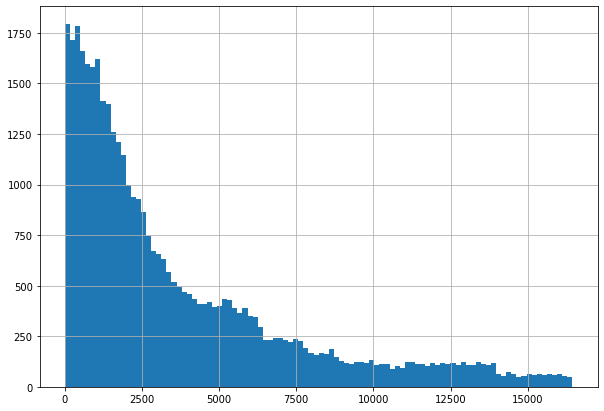

In [29]:
plt.rcParams['figure.figsize'] = (10,7)
result['Ranking'].hist(bins=100)

In [30]:
def get_stat_dif(column):
    cols = result.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(result.loc[result.loc[:, column] == comb[0], 'Rating'],
                     result.loc[result.loc[:, column] == comb[1], 'Rating']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [31]:
cols = ['CuisineStyle',
        'Ranking',
        'Rating',
        'PriceRange',        
        'NumberofReviews',
        'Reviews',
        'SafetyAndSecurity',
        'PersonalFreedom',
        'Governance',
        'SocialCapital',
        'InvestmentEnvironment',
        'EnterpriseConditions',
        'MarketAccessAndInfrastructure',
        'EconomicQuality',
        'LivingConditions',
        'Health',
        'Education',
        'NaturalEnvironment',
        'ReviewTime',
        'PublishTime', 
        'ReviewsMark']

In [32]:
for col in cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки CuisineStyle
Найдены статистически значимые различия для колонки Rating
Найдены статистически значимые различия для колонки PriceRange
Найдены статистически значимые различия для колонки NumberofReviews
Найдены статистически значимые различия для колонки Reviews
Найдены статистически значимые различия для колонки SafetyAndSecurity
Найдены статистически значимые различия для колонки PersonalFreedom
Найдены статистически значимые различия для колонки Governance
Найдены статистически значимые различия для колонки SocialCapital
Найдены статистически значимые различия для колонки InvestmentEnvironment
Найдены статистически значимые различия для колонки EnterpriseConditions
Найдены статистически значимые различия для колонки MarketAccessAndInfrastructure
Найдены статистически значимые различия для колонки EconomicQuality
Найдены статистически значимые различия для колонки LivingConditions
Найдены статистически значимые различия для колонки 

In [33]:
result=result.drop(columns='CuisineStyle')
result=result.drop(columns='ID_TA')
result=result.drop(columns='Reviews')
result=result.drop(columns='URL_TA')
result=result.drop(columns='NaturalEnvironment')




In [34]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = result.drop(['Restaurant_id', 'Rating'], axis = 1)  
y = result['Rating']  
     
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

In [35]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
y_pred = np.round(y_pred*2)/2 


# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


MAE: 0.1733
